WSN VERİ SETİ YÜKLEME VE ANALİZ MODÜLÜ
CSV dosyası yükleniyor...
✓ Veri başarıyla yüklendi!
  - Boyut: 107 satır × 5 sütun

Sütun isimleri:
  1. anchor_ratio
  2. trans_range
  3. node_density
  4. iterations
  5. ale

✓ Sütun isimleri standartlaştırıldı (standart sapma sütunu yok)

Veri tipleri:
anchor_ratio            int64
transmission_range      int64
node_density            int64
iteration_count         int64
ALE                   float64
dtype: object

Temel İstatistikler:
       anchor_ratio  transmission_range  node_density  iteration_count  \
count    107.000000          107.000000    107.000000       107.000000   
mean      20.523364           17.878505    159.813084        47.887850   
std        6.739556            3.107235     71.189109        24.668874   
min       10.000000           12.000000    100.000000        14.000000   
25%       15.000000           15.000000    100.000000        30.000000   
50%       18.000000           17.000000    100.000000        40.000000  

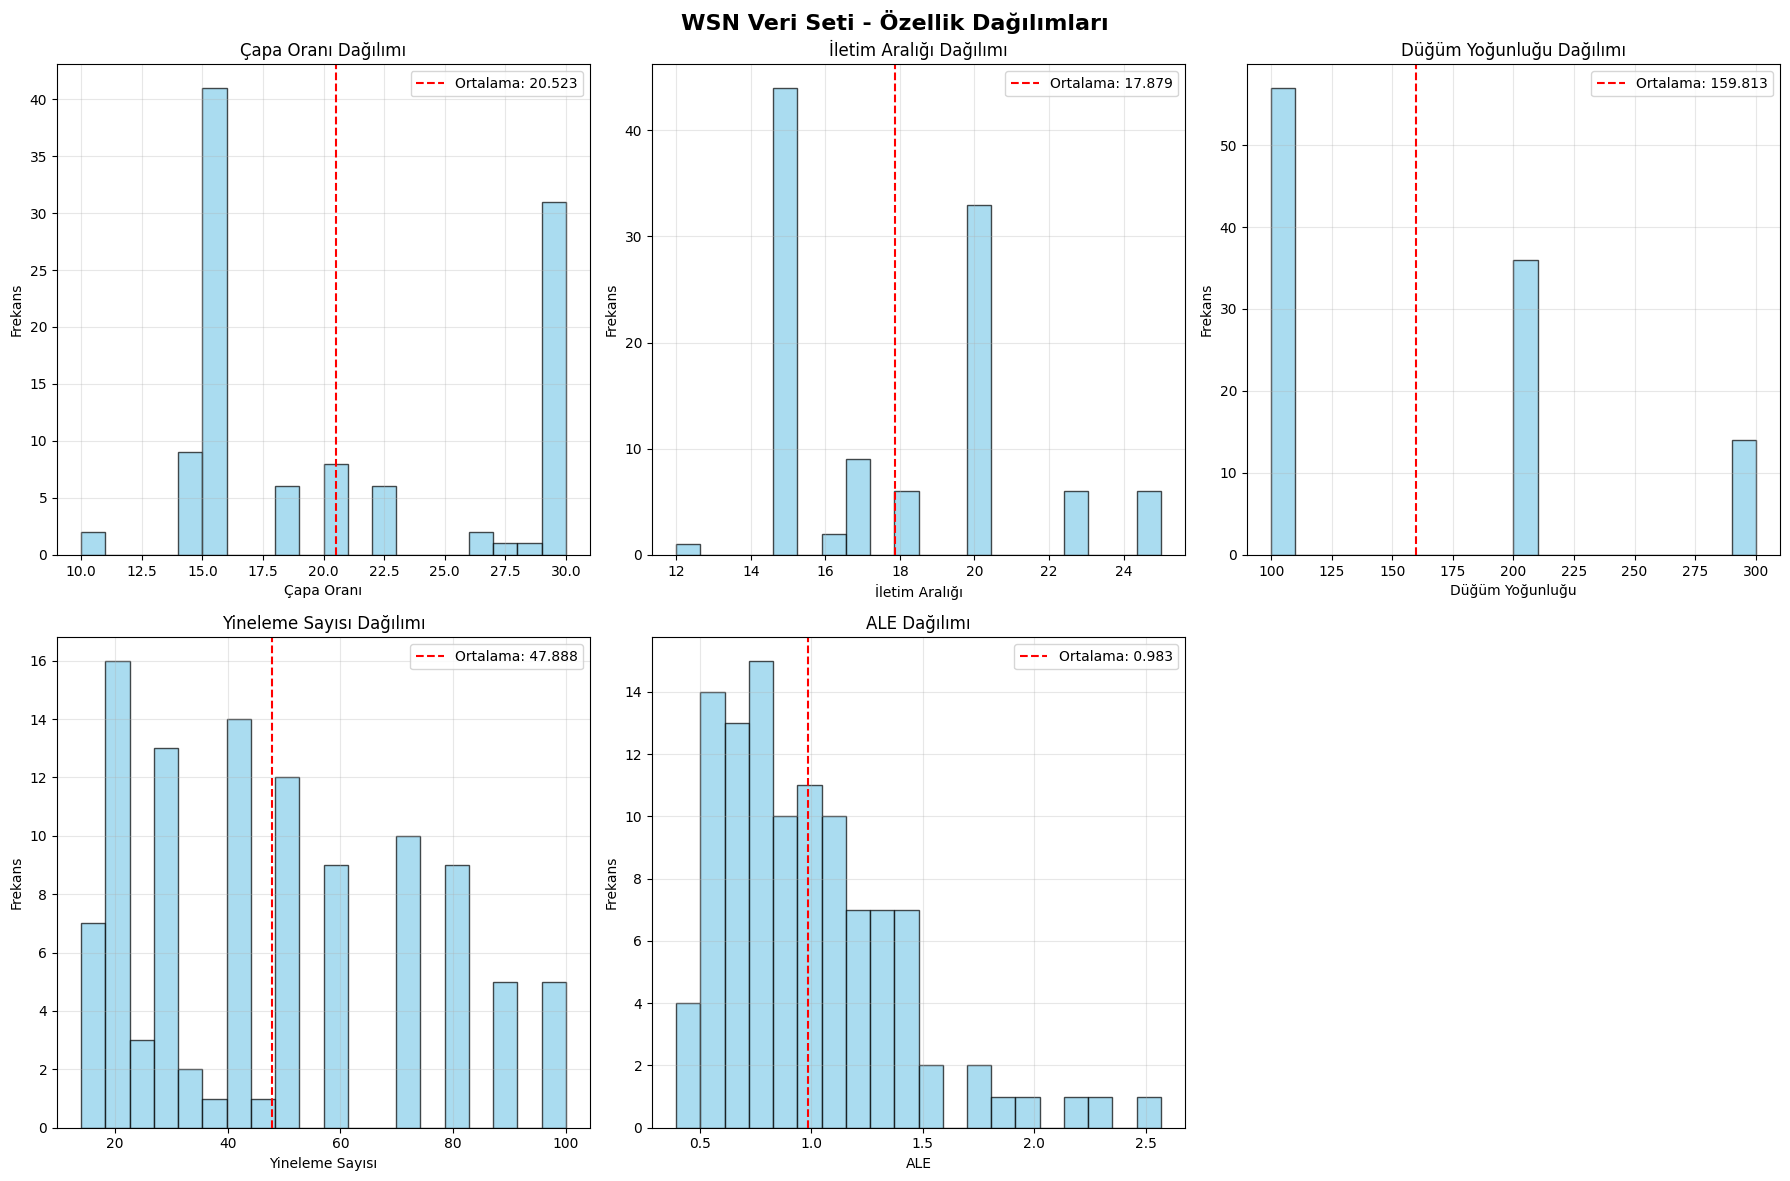

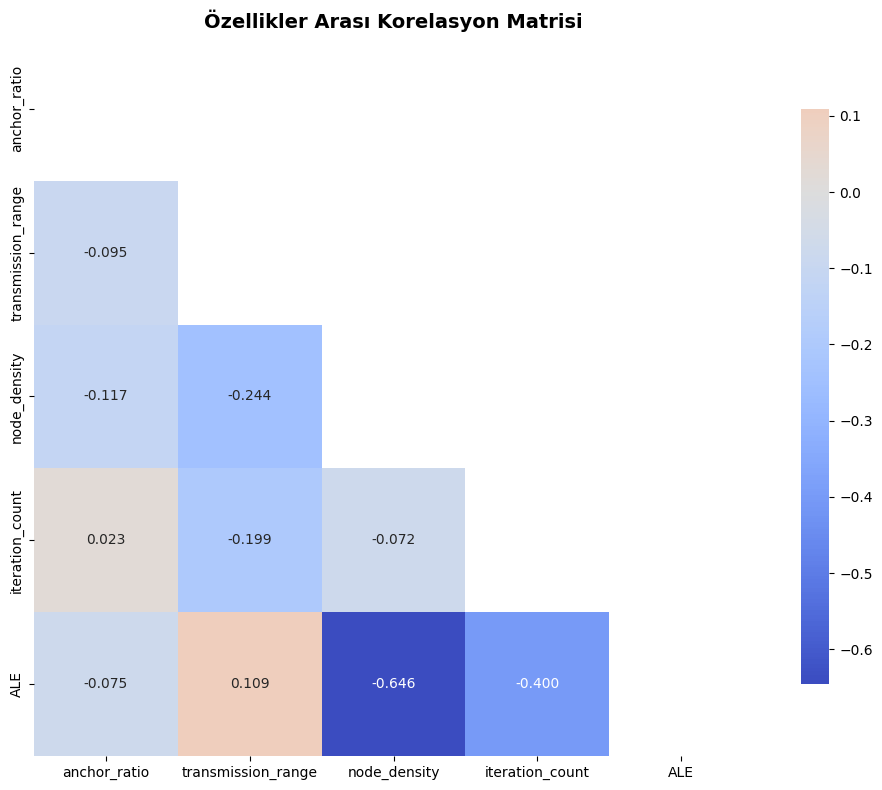

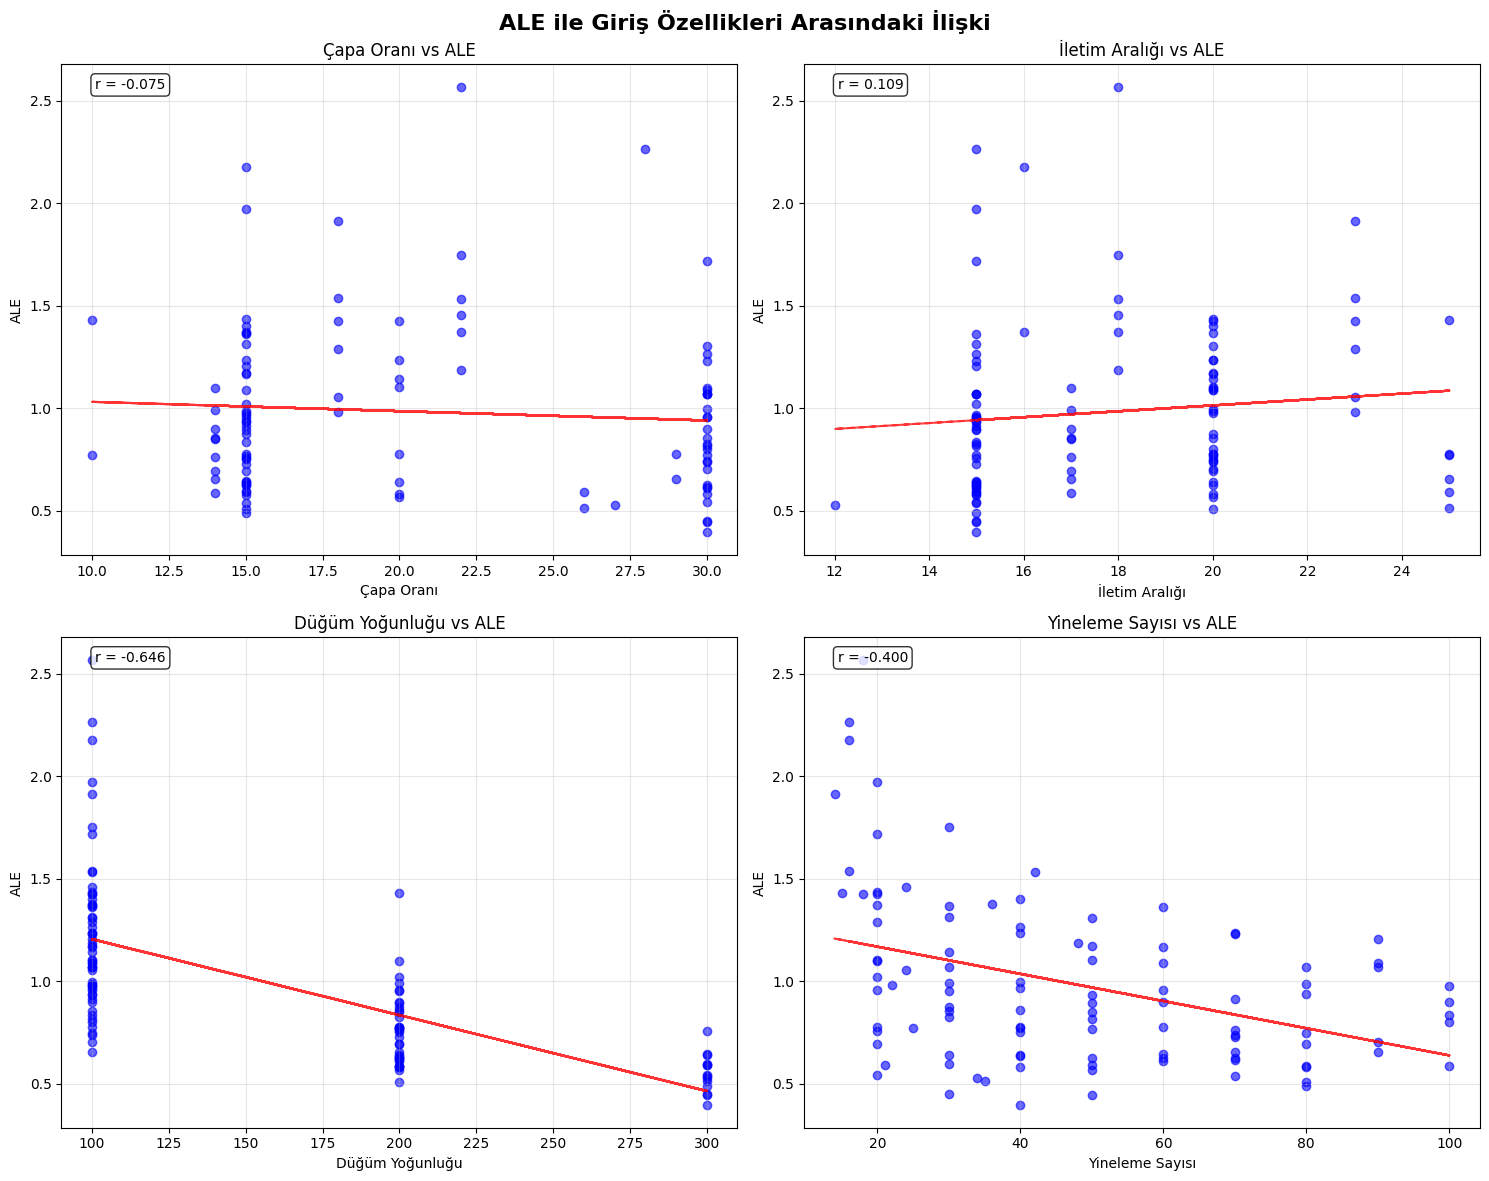

✓ Görselleştirmeler tamamlandı

🔍 Veri formatı doğrulanıyor...
  - Beklenen satır sayısı: 107
  - Gerçek satır sayısı: 107
  - Beklenen sütun sayısı: 5-6
  - Gerçek sütun sayısı: 5
✓ Veri formatı doğrulandı

🔧 Veri bulanık sistem için hazırlanıyor...
✓ Hazırlanan veri boyutu: (107, 5)
  - Giriş özellikleri: 4
  - Çıkış değişkeni: 1 (ALE)

✅ Veri başarıyla yüklendi ve işlendi!
   Bulanık sisteme hazır veri boyutu: (107, 5)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_analyze_csv(file_path='veri.csv'):
    """
    CSV dosyasını yükle ve detaylı analiz yap
    """
    try:
        # CSV dosyasını yükle
        print("CSV dosyası yükleniyor...")
        data = pd.read_csv(file_path)

        print(f"✓ Veri başarıyla yüklendi!")
        print(f"  - Boyut: {data.shape[0]} satır × {data.shape[1]} sütun")

        # Sütun isimlerini kontrol et ve standartlaştır
        print(f"\nSütun isimleri:")
        for i, col in enumerate(data.columns):
            print(f"  {i+1}. {col}")

        # Eğer sütun isimleri farklıysa standart isimleri ata
        expected_columns = ['anchor_ratio', 'transmission_range', 'node_density', 'iteration_count', 'ALE', 'std_dev']

        if len(data.columns) == 6:
            data.columns = expected_columns
            print(f"\n✓ Sütun isimleri standartlaştırıldı")
        elif len(data.columns) == 5:
            # Standart sapma sütunu yoksa
            data.columns = expected_columns[:-1]
            print(f"\n✓ Sütun isimleri standartlaştırıldı (standart sapma sütunu yok)")

        # Veri tiplerini kontrol et
        print(f"\nVeri tipleri:")
        print(data.dtypes)

        # Temel istatistikler
        print(f"\nTemel İstatistikler:")
        print(data.describe())

        # Eksik değer kontrolü
        missing_values = data.isnull().sum()
        if missing_values.any():
            print(f"\n⚠️  Eksik değerler tespit edildi:")
            for col, count in missing_values.items():
                if count > 0:
                    print(f"  - {col}: {count} eksik değer")

            # Eksik değerleri doldur
            print(f"\n📊 Eksik değerler ortalama ile doldurulacak...")
            data = data.fillna(data.mean())
            print(f"✓ Eksik değerler dolduruldu")
        else:
            print(f"\n✓ Eksik değer bulunmuyor")

        # Aykırı değer kontrolü
        print(f"\n🔍 Aykırı değer kontrolü:")
        for col in data.select_dtypes(include=[np.number]).columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
            if len(outliers) > 0:
                print(f"  - {col}: {len(outliers)} aykırı değer tespit edildi")
            else:
                print(f"  - {col}: Aykırı değer yok")

        # Korelasyon analizi
        print(f"\n📈 Korelasyon Analizi:")
        correlation_matrix = data.corr()
        print(correlation_matrix.round(3))

        # Görselleştirme
        create_data_visualizations(data)

        return data.values, data

    except FileNotFoundError:
        print(f"❌ Hata: '{file_path}' dosyası bulunamadı!")
        print("Lütfen dosya yolunu kontrol edin veya dosyayı doğru konuma yerleştirin.")
        return None, None

    except Exception as e:
        print(f"❌ Veri yükleme hatası: {str(e)}")
        return None, None

def create_data_visualizations(data):
    """
    Veri seti için görselleştirmeler oluştur
    """
    print(f"\n🎨 Görselleştirmeler oluşturuluyor...")

    # Figure boyutunu ayarla
    plt.style.use('default')

    # 1. Veri dağılımları
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('WSN Veri Seti - Özellik Dağılımları', fontsize=16, fontweight='bold')

    feature_names = ['Çapa Oranı', 'İletim Aralığı', 'Düğüm Yoğunluğu', 'Yineleme Sayısı', 'ALE']

    for i, (col, name) in enumerate(zip(data.columns[:5], feature_names)):
        row = i // 3
        col_idx = i % 3

        axes[row, col_idx].hist(data[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[row, col_idx].set_title(f'{name} Dağılımı')
        axes[row, col_idx].set_xlabel(name)
        axes[row, col_idx].set_ylabel('Frekans')
        axes[row, col_idx].grid(True, alpha=0.3)

        # İstatistikleri ekle
        mean_val = data[col].mean()
        std_val = data[col].std()
        axes[row, col_idx].axvline(mean_val, color='red', linestyle='--',
                                  label=f'Ortalama: {mean_val:.3f}')
        axes[row, col_idx].legend()

    # Son subplot'u gizle
    axes[1, 2].set_visible(False)

    plt.tight_layout()
    plt.show()

    # 2. Korelasyon matrisi heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()

    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, square=True, fmt='.3f', cbar_kws={"shrink": .8})
    plt.title('Özellikler Arası Korelasyon Matrisi', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 3. ALE ile diğer özellikler arasındaki ilişki
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('ALE ile Giriş Özellikleri Arasındaki İlişki', fontsize=16, fontweight='bold')

    input_features = data.columns[:4]
    feature_names = ['Çapa Oranı', 'İletim Aralığı', 'Düğüm Yoğunluğu', 'Yineleme Sayısı']

    for i, (feature, name) in enumerate(zip(input_features, feature_names)):
        row = i // 2
        col = i % 2

        axes[row, col].scatter(data[feature], data['ALE'], alpha=0.6, color='blue')
        axes[row, col].set_xlabel(name)
        axes[row, col].set_ylabel('ALE')
        axes[row, col].set_title(f'{name} vs ALE')
        axes[row, col].grid(True, alpha=0.3)

        # Trend çizgisi ekle
        z = np.polyfit(data[feature], data['ALE'], 1)
        p = np.poly1d(z)
        axes[row, col].plot(data[feature], p(data[feature]), "r--", alpha=0.8)

        # Korelasyon katsayısını göster
        corr_coef = data[feature].corr(data['ALE'])
        axes[row, col].text(0.05, 0.95, f'r = {corr_coef:.3f}',
                           transform=axes[row, col].transAxes,
                           bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    plt.tight_layout()
    plt.show()

    print("✓ Görselleştirmeler tamamlandı")

def validate_data_format(data):
    """
    Veri formatını doğrula
    """
    print(f"\n🔍 Veri formatı doğrulanıyor...")

    if data is None:
        print("❌ Veri yüklenemedi!")
        return False

    # Beklenen format: 107 satır, 5 veya 6 sütun
    expected_rows = 107
    min_cols = 5
    max_cols = 6

    actual_rows, actual_cols = data.shape

    print(f"  - Beklenen satır sayısı: {expected_rows}")
    print(f"  - Gerçek satır sayısı: {actual_rows}")
    print(f"  - Beklenen sütun sayısı: {min_cols}-{max_cols}")
    print(f"  - Gerçek sütun sayısı: {actual_cols}")

    if actual_rows != expected_rows:
        print(f"⚠️  Uyarı: Satır sayısı beklenenden farklı!")

    if actual_cols < min_cols or actual_cols > max_cols:
        print(f"❌ Hata: Sütun sayısı beklenen aralıkta değil!")
        return False

    # Veri tiplerini kontrol et
    numeric_data = data.select_dtypes(include=[np.number])
    if len(numeric_data.columns) != len(data.columns):
        print(f"⚠️  Uyarı: Tüm sütunlar sayısal değil!")

    print(f"✓ Veri formatı doğrulandı")
    return True

def prepare_data_for_fuzzy_system(data_array):
    """
    Bulanık sistem için veriyi hazırla
    """
    print(f"\n🔧 Veri bulanık sistem için hazırlanıyor...")

    # Son sütun standart sapma ise çıkar
    if data_array.shape[1] == 6:
        # İlk 4 özellik + ALE (standart sapma hariç)
        processed_data = data_array[:, :5]
        print(f"✓ Standart sapma sütunu çıkarıldı")
    else:
        processed_data = data_array

    print(f"✓ Hazırlanan veri boyutu: {processed_data.shape}")
    print(f"  - Giriş özellikleri: {processed_data.shape[1]-1}")
    print(f"  - Çıkış değişkeni: 1 (ALE)")

    return processed_data

# Test fonksiyonu
if __name__ == "__main__":
    print("=" * 60)
    print("WSN VERİ SETİ YÜKLEME VE ANALİZ MODÜLÜ")
    print("=" * 60)

    # Veri yükleme ve analizi
    data_array, data_df = load_and_analyze_csv('veri.csv')

    if data_array is not None:
        # Veri formatını doğrula
        valid = validate_data_format(data_df)

        if valid:
            # Bulanık sistem için hazırla
            processed_data = prepare_data_for_fuzzy_system(data_array)
            print(f"\n✅ Veri başarıyla yüklendi ve işlendi!")
            print(f"   Bulanık sisteme hazır veri boyutu: {processed_data.shape}")
        else:
            print(f"\n❌ Veri formatı uygun değil!")
    else:
        print(f"\n❌ Veri yüklenemedi!")

=== VERİ ANALİZİ ===
Veri seti boyutu: (107, 5)

Değişkenlerin istatistikleri:
       anchor_ratio  trans_range  node_density  iterations         ale
count    107.000000   107.000000    107.000000  107.000000  107.000000
mean      20.523364    17.878505    159.813084   47.887850    0.983471
std        6.739556     3.107235     71.189109   24.668874    0.408313
min       10.000000    12.000000    100.000000   14.000000    0.394029
25%       15.000000    15.000000    100.000000   30.000000    0.655368
50%       18.000000    17.000000    100.000000   40.000000    0.899102
75%       30.000000    20.000000    200.000000   70.000000    1.196418
max       30.000000    25.000000    300.000000  100.000000    2.568407

Değişkenler arası korelasyon (ALE ile):
node_density   -0.694512
iterations     -0.347315
trans_range     0.187683
anchor_ratio   -0.115054
Name: ale, dtype: float64


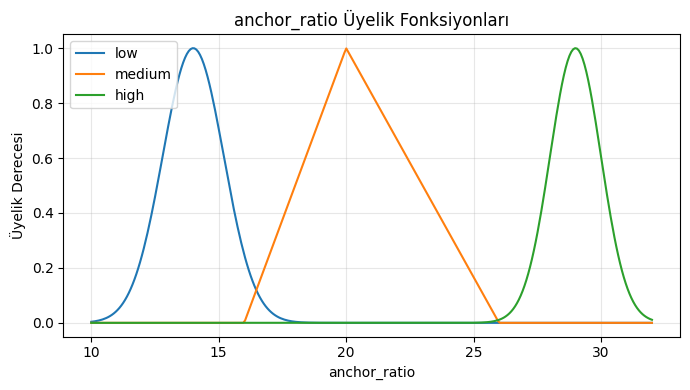

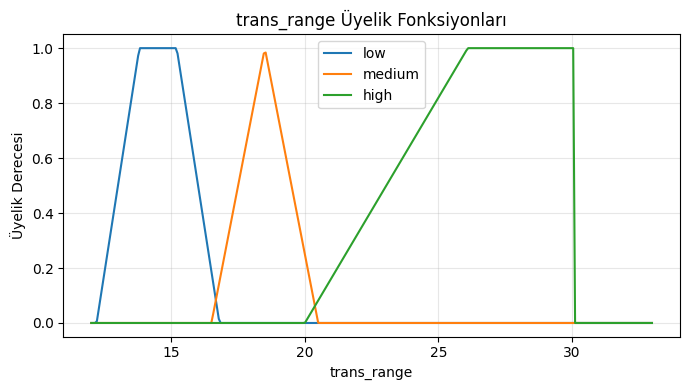

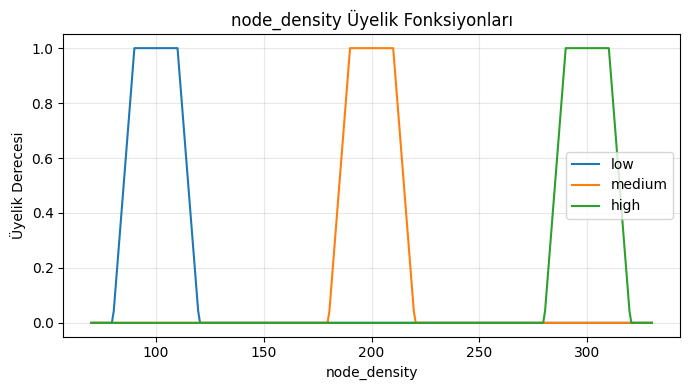

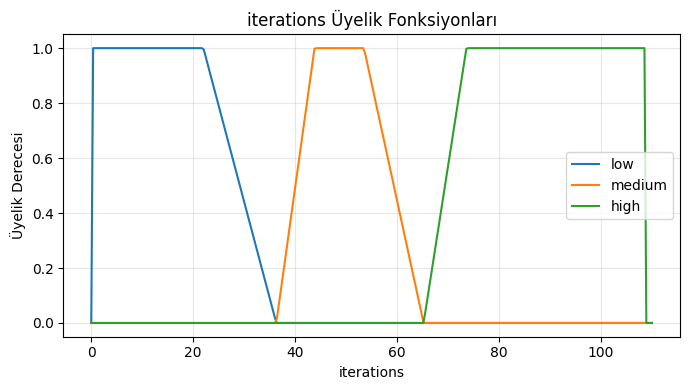

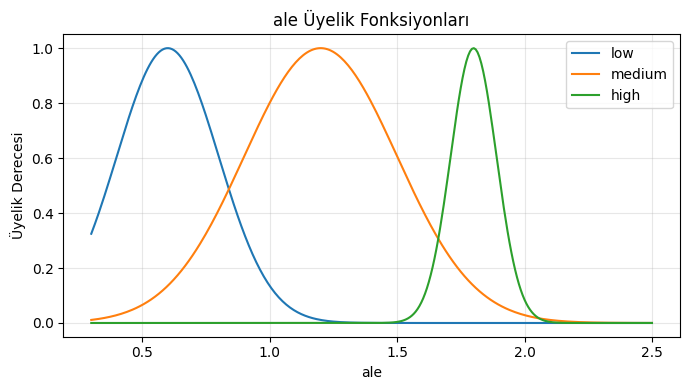


=== FUZZY LOGIC SİSTEM SONUÇLARI ===
Model                Method       Agg   MAE      RMSE     R²      
-----------------------------------------------------------------
Optimized_Tri        centroid     min   0.4380   0.5465   -1.6027 
Optimized_Tri        centroid     prod  0.4380   0.5465   -1.6027 
Optimized_Tri        weighted_avg min   0.3186   0.3863   -0.3007 
Optimized_Tri        weighted_avg prod  0.3186   0.3863   -0.3007 
Optimized_Tri        max_membership min   0.5733   0.7410   -3.7849 
Optimized_Tri        max_membership prod  0.5733   0.7410   -3.7849 
Optimized_Tri        COS          min   0.3957   0.4791   -0.9999 
Optimized_Tri        COS          prod  0.3957   0.4791   -0.9999 
Optimized_Gauss      centroid     min   0.3578   0.4371   -0.6651 
Optimized_Gauss      centroid     prod  0.3581   0.4373   -0.6664 
Optimized_Gauss      weighted_avg min   0.3754   0.4554   -0.8075 
Optimized_Gauss      weighted_avg prod  0.3767   0.4574   -0.8235 
Optimized_Gauss      

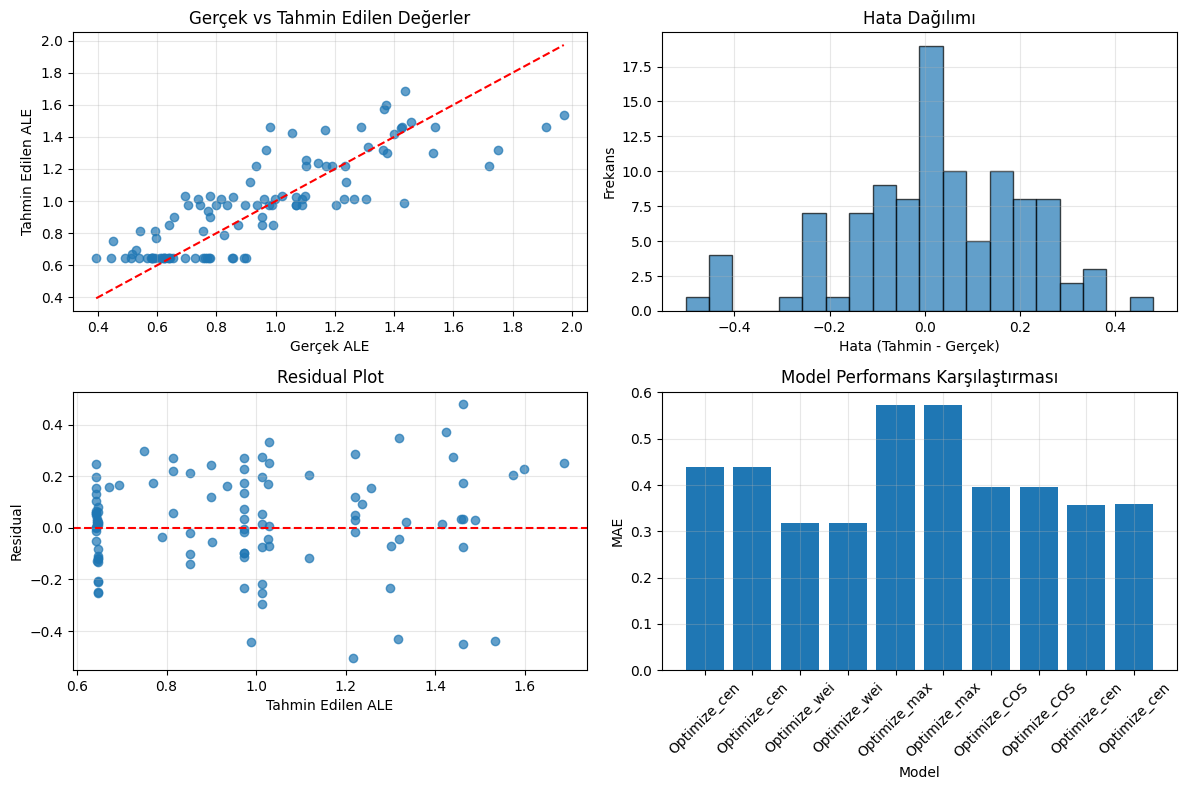


=== SONUÇ ÖZETİ ===
Toplam 32 farklı model kombinasyonu test edildi.
En iyi model MAE: 0.1483
Model veri setinizin özelliklerine göre optimize edilmiştir.

=== LINEER DÜZELTME SONRASI ===
Eğim katsayısı: 0.9575480356843088
Bias (kesişim): 0.014834112958149515
MAE: 0.144662859858292
RMSE: 0.18883717993631116


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1) Veri setini yükle ve ansaliz et
df = pd.read_csv("veri.csv")
print("=== VERİ ANALİZİ ===")
print("Veri seti boyutu:", df.shape)
print("\nDeğişkenlerin istatistikleri:")
print(df.describe())
# 2 üstündeki ale değerlerini sutundan çıkar
df = df[df['ale'] < 2]
print("\nDeğişkenler arası korelasyon (ALE ile):")
correlations = df.corr()['ale'].drop('ale').sort_values(key=abs, ascending=False)
print(correlations)

# 2) Üyelik fonksiyonları
def triangular(x, a, b, c):
    """Üçgen üyelik fonksiyonu"""
    return np.maximum(np.minimum((x - a) / (b - a + 1e-9), (c - x) / (c - b + 1e-9)), 0)

def gaussian(x, mu, sigma):
    """Gauss üyelik fonksiyonu"""
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

def trapezoidal(x, a, b, c, d):
    """Yamuk üyelik fonksiyonu"""
    return np.maximum(np.minimum(np.minimum((x - a) / (b - a + 1e-9), 1), (d - x) / (d - c + 1e-9)), 0)

# 3) Veri analizi sonuçlarına göre özelleştirilmiş üyelik fonksiyonları

# VERİ ANALİZİ SONUÇLARI:
# anchor_ratio: 10-30 arası, çoğu 15-30 arasında
# trans_range: 12-25 arası, çoğu 15-20 arasında
# node_density: 100, 200, 300 değerleri 
# iterations: 14-100 arası, geniş dağılım
# ale: 0.39-2.57 arası, ortalama ~1.0
optimized_triangular = {
    "anchor_ratio": {
        "low":    lambda x: triangular(x, 7.0, 15.0, 18.0),
        "medium": lambda x: triangular(x, 15.0, 18.0, 30.0),
        "high":   lambda x: triangular(x, 18.0, 30.0, 33.0),
    },  # sharp_trapezoidal - sharp_trapezoidal seçildi
    "trans_range": {
        "low":    lambda x: triangular(x, 10.1, 15.0, 17.0),
        "medium": lambda x: triangular(x, 15.0, 17.0, 20.0),
        "high":   lambda x: triangular(x, 17.0, 20.0, 26.9),
    },  # sharp_trapezoidal - sharp_trapezoidal seçildi
    "node_density": {
        "low":    lambda x: triangular(x, 70.0, 100.0, 200.0),
        "medium": lambda x: triangular(x, 100.0, 200.0, 300.0),
        "high":   lambda x: triangular(x, 200.0, 300.0, 330.0),
    },  # sharp_trapezoidal - sharp_trapezoidal seçildi
    "iterations": {
        "low":    lambda x: triangular(x, 1.1, 30.0, 40.0),
        "medium": lambda x: triangular(x, 30.0, 40.0, 70.0),
        "high":   lambda x: triangular(x, 40.0, 70.0, 112.9),
    },  # sharp_trapezoidal - sharp_trapezoidal seçildi


    "ale": {
        "low": lambda x: triangular(x, 0.2, 0.7, 0.9),
        "medium": lambda x: triangular(x, 0.9, 1.2, 1.6),
        "high": lambda x: triangular(x, 1.3, 2.1, 3),
    },
}

# Optimized Gaussian Membership Functions
optimized_gaussian = {
    "anchor_ratio": {
        "low": lambda x: gaussian(x, 14.6, 1.0),
        "medium": lambda x: gaussian(x, 20.0, 1.1),
        "high": lambda x: gaussian(x, 29.6, 1.5),
    },
    "trans_range": {
        "low": lambda x: gaussian(x, 15.3, 0.9),
        "medium": lambda x: gaussian(x, 19.7, 0.7),
        "high": lambda x: gaussian(x, 24.0, 1.0),
    },
    "node_density": {
        "low":    lambda x: triangular(x, 70.0, 100.0, 200.0),
        "medium": lambda x: triangular(x, 100.0, 200.0, 300.0),
        "high":   lambda x: triangular(x, 200.0, 300.0, 330.0),
    },  # sharp_trapezoidal - sharp_trapezoidal seçildi
    "iterations": {
        "low": lambda x: gaussian(x, 23.9, 7.8),
        "medium": lambda x: gaussian(x, 48.6, 10.8),
        "high": lambda x: gaussian(x, 81.7, 6.0),
    },
    "ale": {
        "low": lambda x: gaussian(x, 0.7, 0.2),
        "medium": lambda x: gaussian(x, 1.2, 0.3),
        "high": lambda x: gaussian(x, 1.8, 0.4),
    },
}
# Hibrit model - daha iyi performans için
hybrid_optimized = {
   "anchor_ratio": {
    "low": lambda x: gaussian(x, 14.0, 1.2),      
    "medium": lambda x: triangular(x, 16.0, 20.0, 26.0),  
    "high": lambda x: gaussian(x, 29.0, 1.0),     
    },
    "trans_range": {
    "low": lambda x: trapezoidal(x, 12.2, 13.8, 15.2, 16.8),   
    "medium": lambda x: triangular(x, 16.5, 18.5, 20.5),       
    "high": lambda x: trapezoidal(x, 20.0, 26.1, 30.1, 30.1),  
    },
    "node_density": {
      "low": lambda x: trapezoidal(x, 80, 90, 110, 120),
      "medium": lambda x: trapezoidal(x, 180, 190, 210, 220),
      "high": lambda x: trapezoidal(x, 280, 290, 310, 320),

    },
    "iterations": {
        "low": lambda x: trapezoidal(x, 0, 0, 22, 36.3),
        "medium": lambda x: trapezoidal(x, 36.3, 43.8, 53.5, 65.2),
        "high": lambda x: trapezoidal(x, 65.2, 73.6, 108.6, 108.6),
    },
    "ale": {
        "low": lambda x: gaussian(x, 0.6, 0.2),
        "medium": lambda x: gaussian(x, 1.2, 0.3),
        "high": lambda x: gaussian(x, 1.8, 0.09),
    },

}
optimized_trapezoidal = {
    "anchor_ratio": {
        "low": lambda x: trapezoidal(x, 8.0, 13.2, 16.1, 17.3),
        "medium": lambda x: trapezoidal(x, 17.3, 18.0, 22.0, 24.8),
        "high": lambda x: trapezoidal(x, 24.8, 26.6, 32.5, 32.0),
    },
    "trans_range": {
        "low": lambda x: trapezoidal(x, 10.7, 13.8, 16.8, 17.5),
        "medium": lambda x: trapezoidal(x, 17.5, 17.7, 21.7, 21.8),
        "high": lambda x: trapezoidal(x, 21.8, 21.6, 26.4, 26.3),
    },
    "node_density": {
        "low": lambda x: trapezoidal(x, 80.0, 90.0, 110.0, 150.0),
        "medium": lambda x: trapezoidal(x, 150.0, 180.0, 220.0, 250.0),
        "high": lambda x: trapezoidal(x, 250.0, 270.0, 330.0, 320.0),
    },
    "iterations": {
        "low": lambda x: trapezoidal(x, 5.4, 21.5, 26.3, 36.3),
        "medium": lambda x: trapezoidal(x, 36.3, 43.8, 53.5, 65.2),
        "high": lambda x: trapezoidal(x, 65.2, 73.6, 89.9, 108.6),
    },
    "ale": {
        "low": lambda x: trapezoidal(x, 0.2, 0.6, 0.8, 0.9),
        "medium": lambda x: trapezoidal(x, 0.9, 1.1, 1.3, 1.6),
        "high": lambda x: trapezoidal(x, 1.6, 1.8, 2.3, 2.8),
    },
}
# ALE çıkış değerleri - veri analizi sonuçlarına göre

ale_centers = {"low": 0.5, "medium": 1.3, "high": 2.4}

ale_x = np.linspace(0.35, 2.6, 300)
import numpy as np
import matplotlib.pyplot as plt

# ALE için x aralığı sabit
x_ranges = {
    "anchor_ratio": np.linspace(10, 32, 300),
    "trans_range": np.linspace(12, 33, 300),
    "node_density": np.linspace(70, 330, 300),
    "iterations": np.linspace(0, 110, 300),
    "ale": np.linspace(0.3, 2.5, 300),
}

# Üyelik fonksiyonlarını çizdirme
def plot_membership_functions(mf_dict, variable_name):
    x_vals = x_ranges[variable_name]
    plt.figure(figsize=(7, 4))
    for label, func in mf_dict[variable_name].items():
        y_vals = [func(x) for x in x_vals]
        plt.plot(x_vals, y_vals, label=label)
    plt.title(f"{variable_name} Üyelik Fonksiyonları")
    plt.xlabel(variable_name)
    plt.ylabel("Üyelik Derecesi")
    plt.ylim(-0.05, 1.05)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Tüm giriş değişkenleri için çizim
for var in hybrid_optimized:
    plot_membership_functions(hybrid_optimized, var)


# ALE çıkış değerleri - veri analizi sonuçlarına göre

enhanced_rules = [
    ({"node_density": "low", "iterations" : "low"}, "high", 4.8),
    ({"node_density": "low"}, "high", 2), # daha güçlü kural
    ({"node_density": "medium"}, "low", 1.4),
    ({"node_density": "high"}, "low", 2.5),
    ({"iterations": "low"}, "high", 1.4),   # daha etkili
    ({"iterations": "medium"}, "low", 1.0),
    ({"iterations": "high"}, "low", 2.5),
    ({"anchor_ratio": "high"}, "low", 3.5),  # önemli
    ({"anchor_ratio": "medium"}, "low", 1.0),
    ({"trans_range": "medium"}, "low", 1.0),
     ({"trans_range": "high"}, "low", 2.0),
    
    # # 1. Düşük iterations'da yüksek ALE için
    # ({"iterations": "low", "anchor_ratio": "medium"}, "high", 3.0),  # 18+20 → yüksek ALE
    # ({"iterations": "low", "trans_range": "high"}, "high", 2.5),     # 23+düşük iter → yüksek ALE
    # 2. node_density=300 + düşük iterations kombinasyonu için
    ({"node_density": "high", "iterations": "low"}, "low", 4.0),     # 300+düşük iter → düşük ALE
    ({"node_density": "high", "anchor_ratio": "high", "trans_range": "low"}, "low", 5.0), # 300+30+15 → çok düşük
    # 3. anchor_ratio=30 problemli kombinasyonları için
    ({"anchor_ratio": "high", "trans_range": "low", "iterations": "low"}, "low", 4.0),    # 30+15+düşük → düşük
    ({"anchor_ratio": "high", "trans_range": "low", "iterations": "medium"}, "low", 3.0),  # 30+15+orta → düşük
    # 4. Spesifik problemli durumlar için
    ({"anchor_ratio": "medium", "trans_range": "high", "node_density": "low"}, "high", 3.0), # 18+23+100 → yüksek
    ({"node_density": "high", "trans_range": "high"}, "low", 2.0),   # 300+25 → düşük
     ({"anchor_ratio": "high", "node_density": "high"}, "low", 5.0),
     ({"iterations": "high", "node_density": "high"}, "low", 2.0),
    # ({"iterations": "low", "node_density": "low"}, "high", 2.0),
    # ({"anchor_ratio": "high", "trans_range": "high"}, "low", 1.0),
        # Kombine kurallar - yeni değişkenlerle
      ({"anchor_ratio": "low", "trans_range": "low"}, "low", 1.0),
    # ({"anchor_ratio": "low", "trans_range": "medium"}, "high", 1.0),
    # ({"anchor_ratio": "low", "anchor_ratio": "medium"}, "high", 1.0),

    ({}, "medium", 0.1),  
]
# 5) Geliştirilmiş defuzzification yöntemleri
def defuzz_centroid(activations, ale_mf_dict):
    """Ağırlık merkezi yöntemi"""
    agg = np.zeros_like(ale_x)
    for term, act in activations.items():
        if act > 0:
            mf_vals = ale_mf_dict[term](ale_x)
            agg = np.maximum(agg, np.minimum(act, mf_vals))

    if agg.sum() == 0:
        return 1.2
    return np.sum(ale_x * agg) / agg.sum()

def defuzz_weighted_average(activations):
    """Ağırlıklı ortalama yöntemi"""
    if not activations or sum(activations.values()) == 0:
        return 1.2

    num = sum(act * ale_centers[term] for term, act in activations.items() if act > 0)
    den = sum(act for act in activations.values() if act > 0)
    return num / den

def defuzz_center_of_sums(activations, ale_mf_dict):
    agg = np.zeros_like(ale_x)
    for term, act in activations.items():
        if act > 0:
            agg += ale_mf_dict[term](ale_x) * act
    if agg.sum() == 0:
        return 1.2
    return np.sum(ale_x * agg) / agg.sum()

def defuzz_max_membership(activations):
    """Maksimum üyelik yöntemi"""
    if not activations:
        return 1.2
    max_term = max(activations.items(), key=lambda x: x[1])
    return ale_centers[max_term[0]]

# 6) Tek satır değerlendirme fonksiyonu
def evaluate_row(row, mfs, method, aggregation="max"):
    rule_strengths = []
    rule_terms = []
    rule_weights = []

    for antecedents, consequent, weight in enhanced_rules:
        if not antecedents:  # default rule
            strength = 0.1
        else:
            if aggregation == "min":
                strength = min(mfs[var][setname](row[var]) for var, setname in antecedents.items())
            elif aggregation == "prod":
                strength = np.prod([mfs[var][setname](row[var]) for var, setname in antecedents.items()])
            else:  # default to max (actually still using min logic)
                strength = min(mfs[var][setname](row[var]) for var, setname in antecedents.items())

        weighted_strength = strength * weight
        rule_strengths.append(weighted_strength)
        rule_terms.append(consequent)

    # Aktivasyonları hesapla
    activations = {}
    for strength, term in zip(rule_strengths, rule_terms):
        if strength > 0:
            activations[term] = max(activations.get(term, 0), strength)

    # Defuzzification
    if method == "centroid":
        return defuzz_centroid(activations, mfs["ale"])
    elif method == "weighted_avg":
        return defuzz_weighted_average(activations)
    elif method == "max_membership":
        return defuzz_max_membership(activations)
    elif method == "COS":
        return defuzz_center_of_sums(activations, mfs["ale"])
    else:
        return defuzz_weighted_average(activations)


# 7) Tüm kombinasyonları test et
def run_combination(mfs, method, aggregation="min"):
    """Bir kombinasyon için sonuçları hesapla"""
    predictions = []
    for _, row in df.iterrows():
        pred = evaluate_row(row, mfs, method, aggregation)
        predictions.append(pred)

    mae = mean_absolute_error(df["ale"], predictions)
    rmse = np.sqrt(mean_squared_error(df["ale"], predictions))
    r2 = r2_score(df["ale"], predictions)

    return mae, rmse, r2, predictions

# 8) Tüm kombinasyonları çalıştır ve sonuçları karşılaştır
print("\n=== FUZZY LOGIC SİSTEM SONUÇLARI ===")
print(f"{'Model':<20} {'Method':<12} {'Agg':<5} {'MAE':<8} {'RMSE':<8} {'R²':<8}")
print("-" * 65)

all_results = []
mf_dict = {
    "Optimized_Tri": optimized_triangular,
    "Optimized_Gauss": optimized_gaussian,
    "Hybrid_Optimized": hybrid_optimized,
    "Optimized_Trap": optimized_trapezoidal
}

methods = ["centroid", "weighted_avg", "max_membership","COS"]
aggregations = ["min", "prod"]

best_result = None
best_score = float('inf')

for mf_name, mfs in mf_dict.items():
    for method in methods:
        for agg in aggregations:
            try:
                mae, rmse, r2, preds = run_combination(mfs, method, agg)

                print(f"{mf_name:<20} {method:<12} {agg:<5} {mae:<8.4f} {rmse:<8.4f} {r2:<8.4f}")

                all_results.append({
                    'model': mf_name,
                    'method': method,
                    'aggregation': agg,
                    'mae': mae,
                    'rmse': rmse,
                    'r2': r2,
                    'predictions': preds
                })

                # En iyi modeli takip et (MAE'ye göre)
                if mae < best_score:
                    best_score = mae
                    best_result = all_results[-1].copy()

            except Exception as e:
                print(f"{mf_name:<20} {method:<12} {agg:<5} ERROR: {str(e)[:20]}")

print(f"\n=== EN İYİ MODEL ===")
if best_result:
    print(f"Model: {best_result['model']}")
    print(f"Method: {best_result['method']}")
    print(f"Aggregation: {best_result['aggregation']}")
    print(f"MAE: {best_result['mae']:.4f}")
    print(f"RMSE: {best_result['rmse']:.4f}")
    print(f"R²: {best_result['r2']:.4f}")

# 9) Görselleştirme
if best_result:

    df_hatalar = df.copy()
    df_hatalar["tahmin"] = best_result["predictions"]
    df_hatalar["hata"] = df_hatalar["tahmin"] - df_hatalar["ale"]
    df_hatalar["mutlak_hata"] = np.abs(df_hatalar["hata"])

    # Hatalara göre sıralama (en büyük hata en üstte)
    df_hatalar_sorted = df_hatalar.sort_values("mutlak_hata", ascending=False)

    # En kötü 10 tahmini yazdır
    print("\n=== EN HATALI 20 TAHMİN ===")
    print(df_hatalar_sorted[["anchor_ratio", "trans_range", "node_density", "iterations", "ale", "tahmin", "hata", "mutlak_hata"]].head(20))

    plt.figure(figsize=(12, 8))

    # Gerçek vs Tahmin edilen değerler
    plt.subplot(2, 2, 1)
    plt.scatter(df["ale"], best_result['predictions'], alpha=0.7)
    plt.plot([df["ale"].min(), df["ale"].max()], [df["ale"].min(), df["ale"].max()], 'r--')
    plt.xlabel('Gerçek ALE')
    plt.ylabel('Tahmin Edilen ALE')
    plt.title('Gerçek vs Tahmin Edilen Değerler')
    plt.grid(True, alpha=0.3)

    # Hata dağılımı
    plt.subplot(2, 2, 2)
    errors = np.array(best_result['predictions']) - df["ale"].values
    plt.hist(errors, bins=20, alpha=0.7, edgecolor='black')
    plt.xlabel('Hata (Tahmin - Gerçek)')
    plt.ylabel('Frekans')
    plt.title('Hata Dağılımı')
    plt.grid(True, alpha=0.3)

    # Residual plot
    plt.subplot(2, 2, 3)
    plt.scatter(best_result['predictions'], errors, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Tahmin Edilen ALE')
    plt.ylabel('Residual')
    plt.title('Residual Plot')
    plt.grid(True, alpha=0.3)

    # Model performansı karşılaştırması
    plt.subplot(2, 2, 4)
    mae_values = [r['mae'] for r in all_results[:10]]  # İlk 10 model
    model_names = [f"{r['model'][:8]}_{r['method'][:3]}" for r in all_results[:10]]
    plt.bar(range(len(mae_values)), mae_values)
    plt.xlabel('Model')
    plt.ylabel('MAE')
    plt.title('Model Performans Karşılaştırması')
    plt.xticks(range(len(model_names)), model_names, rotation=45)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

print(f"\n=== SONUÇ ÖZETİ ===")
print(f"Toplam {len(all_results)} farklı model kombinasyonu test edildi.")
print(f"En iyi model MAE: {best_score:.4f}")
print("Model veri setinizin özelliklerine göre optimize edilmiştir.")

# 🔧 Lineer Regresyon ile Eğimi Düzelt
from sklearn.linear_model import LinearRegression

y_true = df["ale"].values
y_pred = np.array(best_result["predictions"])

reg = LinearRegression().fit(y_pred.reshape(-1, 1), y_true)
y_pred_corrected = reg.predict(y_pred.reshape(-1, 1))

print("\n=== LINEER DÜZELTME SONRASI ===")
print("Eğim katsayısı:", reg.coef_[0])
print("Bias (kesişim):", reg.intercept_)
print("MAE:", mean_absolute_error(y_true, y_pred_corrected))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred_corrected)))
